<a href="https://colab.research.google.com/github/rupaas/Explainable-Ai/blob/main/explainable_AI_assig_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install LIME

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=187b97d3b02bdcc2cc43cf25db361d430197bd17922679a14d6454b1c5828d46
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built LIME


Features: (569, 30) Target distribution:
 target
1    357
0    212
Name: count, dtype: int64
Accuracy: 0.956140350877193
ROC AUC: 0.9910714285714286
              precision    recall  f1-score   support

           0     0.9744    0.9048    0.9383        42
           1     0.9467    0.9861    0.9660        72

    accuracy                         0.9561       114
   macro avg     0.9605    0.9454    0.9521       114
weighted avg     0.9569    0.9561    0.9558       114


Top 10 Permutation Importance (mean decrease in ROC AUC):
                feature  importance_mean  importance_std
0            worst area         0.016391        0.007227
1  worst concave points         0.016369        0.006413
2            area error         0.006922        0.003568
3         worst texture         0.003362        0.003782
4      worst smoothness         0.002679        0.001603
5   mean concave points         0.002238        0.002383
6       worst perimeter         0.001642        0.003400
7        

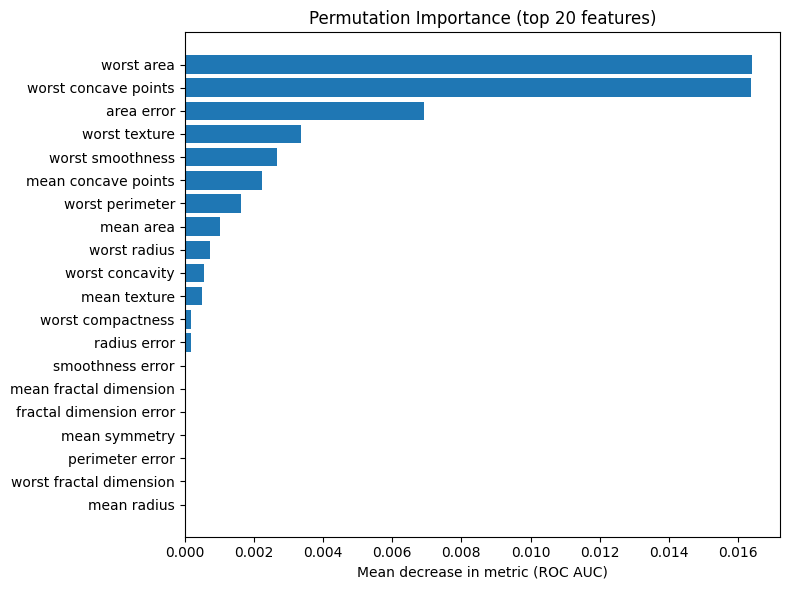

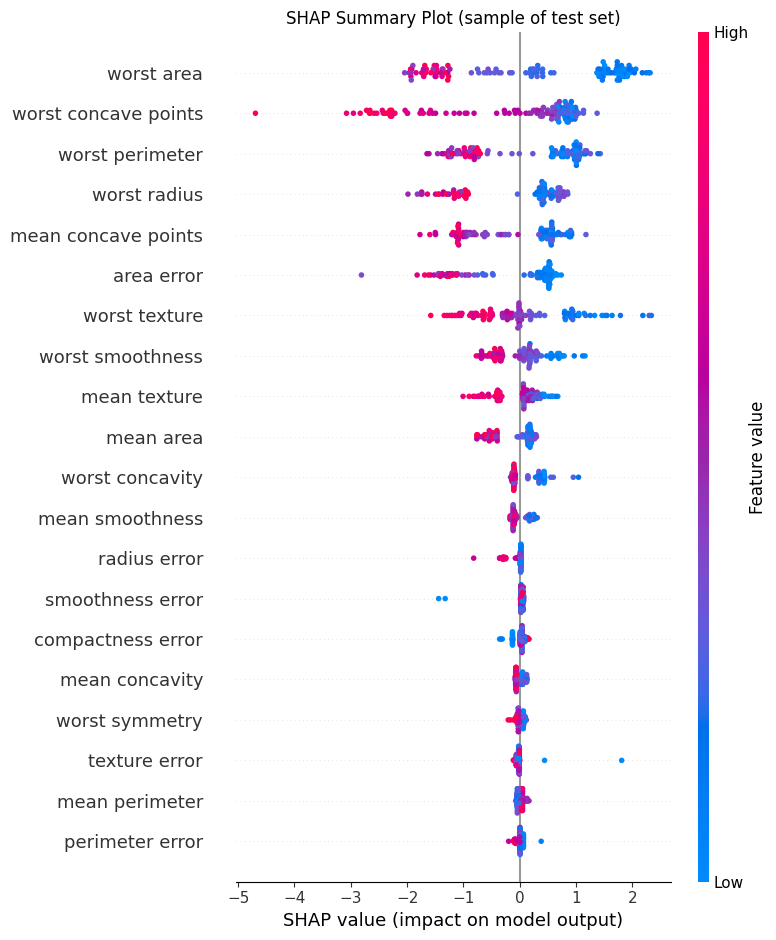


Selected test indices -> malignant: 256 benign: 428


<Figure size 800x300 with 0 Axes>

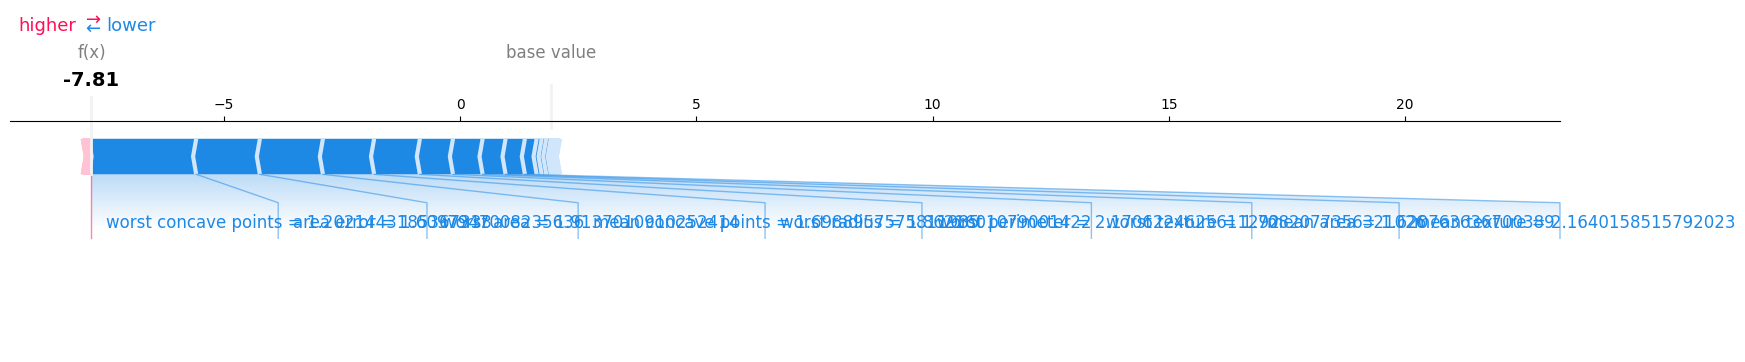

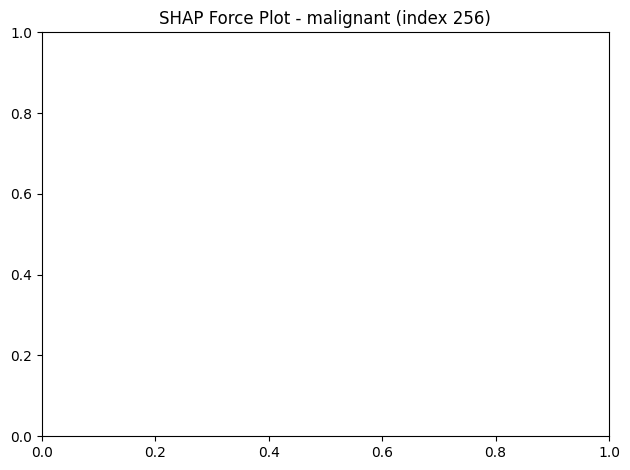

<Figure size 800x300 with 0 Axes>

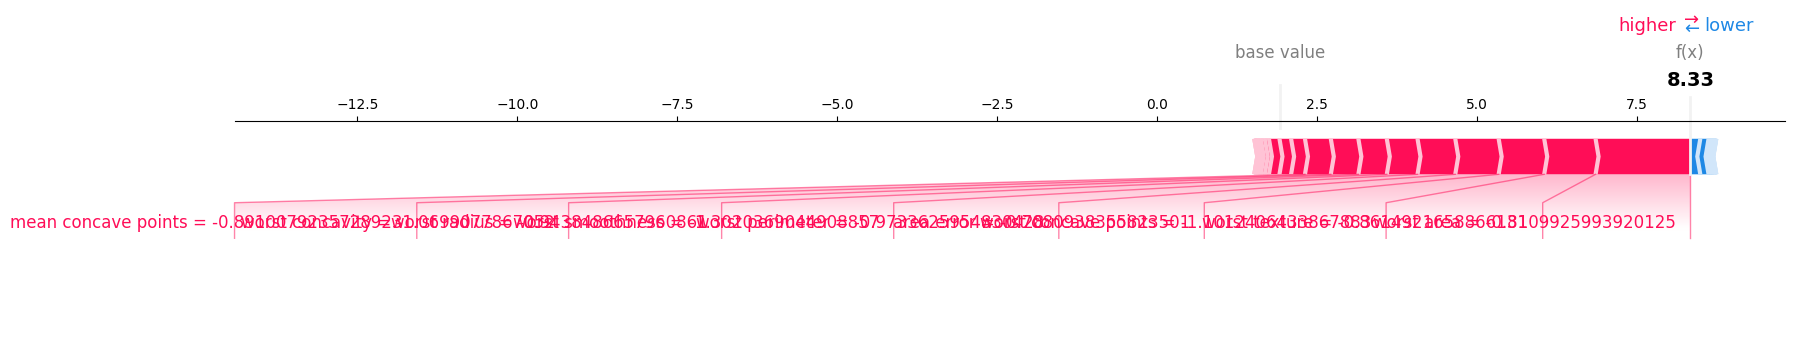

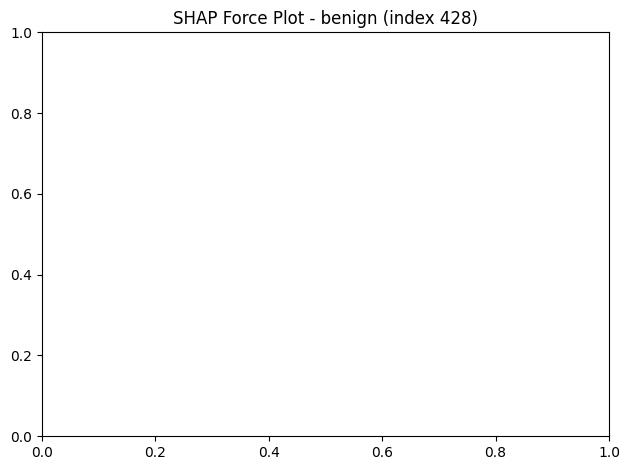

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



LIME explanation for malignant case:
[('worst concave points > 0.16', -0.4753634920760248), ('worst area > 1033.50', -0.2746543539324461), ('area error > 44.77', -0.2339047591340167), ('worst texture > 29.37', -0.15131508948895267), ('mean concave points > 0.07', -0.1288153319981867), ('worst radius > 18.55', -0.11917861573984272), ('worst perimeter > 124.95', -0.10647004116729154), ('mean texture > 21.71', -0.09313648634882016)]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



LIME explanation for benign case:
[('worst area <= 513.90', 0.21668339335207462), ('worst concave points <= 0.06', 0.19540449357096912), ('worst texture <= 21.09', 0.1842083487834921), ('area error <= 17.73', 0.10429358501837953), ('worst smoothness <= 0.12', 0.08197801688414087), ('worst perimeter <= 83.72', 0.07066539854629596), ('mean concave points <= 0.02', 0.06594023255063998), ('worst concavity <= 0.11', 0.044062954740235444)]


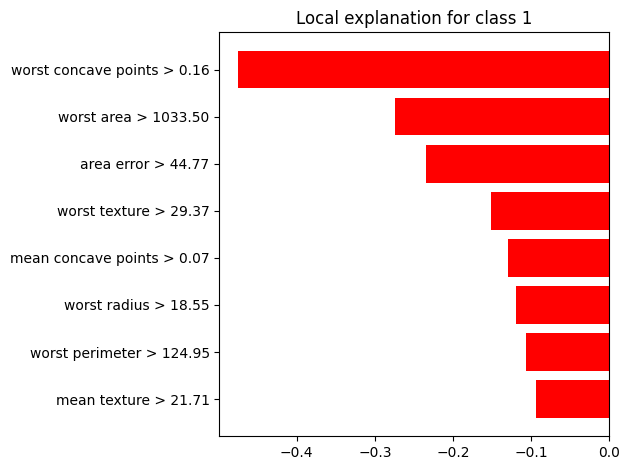

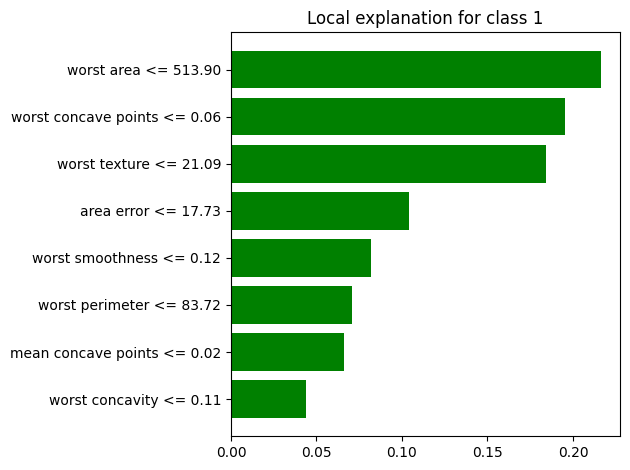


Top permutation importance features (top 10): ['worst area', 'worst concave points', 'area error', 'worst texture', 'worst smoothness', 'mean concave points', 'worst perimeter', 'mean area', 'worst radius', 'worst concavity']

Top SHAP features (top 10):
                feature  mean_abs_shap
0            worst area       1.344000
1  worst concave points       1.116870
2       worst perimeter       0.933069
3          worst radius       0.756796
4   mean concave points       0.726892
5            area error       0.723162
6         worst texture       0.628159
7      worst smoothness       0.370760
8          mean texture       0.310490
9             mean area       0.291220

All plots saved: permutation_importance.png, shap_summary.png, shap_force_malignant.png, shap_force_benign.png, lime_malignant.png, lime_benign.png


In [ ]:
# Assignment 2 — Breast Cancer (Binary Classification)
# Requirements: sklearn, shap, lime, matplotlib, pandas, numpy
# Run in Jupyter/Colab. If running locally, ensure you have the packages installed.

# Install missing packages (uncomment if needed in Colab)
# !pip install shap lime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import lime
import lime.lime_tabular
import joblib
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 1. Load dataset
data = load_breast_cancer(as_frame=True)
X = data.frame.drop(columns=['target'])
y = data.frame['target']  # 0 = malignant? (sklearn: 0=malignant, 1=benign) -> check classes
# Note: sklearn load_breast_cancer has target 0=malignant, 1=benign (confirm in your run)
print("Features:", X.shape, "Target distribution:\n", y.value_counts())

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Build pipeline: scaler + GradientBoosting
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("gb", GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42))
])

pipe.fit(X_train, y_train)

# Evaluate
y_proba = pipe.predict_proba(X_test)[:, 1]
y_pred = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=4))

# Save model if desired
# joblib.dump(pipe, "gb_breast_cancer.pkl")

# 4. Permutation Importance (global)
# Use the pipeline's predict_proba via the prepped X_test (permutation_importance will call predict)
r = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1, scoring="roc_auc")

perm_imp_df = (
    pd.DataFrame({
        "feature": X.columns,
        "importance_mean": r.importances_mean,
        "importance_std": r.importances_std
    })
    .sort_values("importance_mean", ascending=False)
    .reset_index(drop=True)
)

print("\nTop 10 Permutation Importance (mean decrease in ROC AUC):")
print(perm_imp_df.head(10))

# Plot Permutation Importance
plt.figure(figsize=(8,6))
plt.barh(perm_imp_df['feature'].head(20)[::-1], perm_imp_df['importance_mean'].head(20)[::-1])
plt.xlabel("Mean decrease in metric (ROC AUC)")
plt.title("Permutation Importance (top 20 features)")
plt.tight_layout()
plt.savefig("permutation_importance.png", dpi=200)
plt.show()

# 5. SHAP: global summary & local explanations
# For tree models, use TreeExplainer — we need the underlying fitted estimator and the preprocessed matrix.
# Get the fitted gradient boosting model and the scaler transform
gb_model = pipe.named_steps['gb']
scaler = pipe.named_steps['scaler']

# Transform X_test to numeric array used by model
X_test_scaled = scaler.transform(X_test)  # numpy array
feature_names = X.columns.tolist()

# To speed up SHAP, sample (for summary) but ensure local explanations use full instance
shap_sample = X_test_scaled if X_test_scaled.shape[0] <= 500 else X_test_scaled[:500]

# Create TreeExplainer
explainer = shap.TreeExplainer(gb_model)
# shap_values shape: list [class0, class1] for multiclass, for binary shap returns array shaped (n_samples, n_features)
# For sklearn's GradientBoostingClassifier, TreeExplainer returns shap_values as (n_samples, n_features) for binary predict_proba of class 1.
shap_values = explainer.shap_values(shap_sample)  # may be (n_samples, n_features)
# If shap_values is a list, take the second element for positive class:
if isinstance(shap_values, list):
    shap_vals_for_pos = shap_values[1]
else:
    shap_vals_for_pos = shap_values

# Global summary plot
shap.summary_plot(shap_vals_for_pos, shap_sample, feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot (sample of test set)")
plt.tight_layout()
plt.savefig("shap_summary.png", dpi=200)
plt.show()

# 6. Select two test instances: one malignant (target=0) and one benign (target=1)
# Need to find indices in X_test corresponding to each class
test_idx = X_test.index.to_numpy()
mal_idx = None
ben_idx = None
for i, idx in enumerate(test_idx):
    if y_test.loc[idx] == 0 and mal_idx is None:
        mal_idx = idx
    if y_test.loc[idx] == 1 and ben_idx is None:
        ben_idx = idx
    if mal_idx is not None and ben_idx is not None:
        break

print("\nSelected test indices -> malignant:", mal_idx, "benign:", ben_idx)

# Prepare arrays for these instances
x_mal = X_test.loc[[mal_idx]]
x_ben = X_test.loc[[ben_idx]]
x_mal_scaled = scaler.transform(x_mal)
x_ben_scaled = scaler.transform(x_ben)

# SHAP local force plots (matplotlib static)
# We compute shap_values for these instances
shap_vals_mal = explainer.shap_values(x_mal_scaled)
shap_vals_ben = explainer.shap_values(x_ben_scaled)
if isinstance(shap_vals_mal, list):
    shap_vals_mal_pos = shap_vals_mal[1]
    shap_vals_ben_pos = shap_vals_ben[1]
else:
    shap_vals_mal_pos = shap_vals_mal
    shap_vals_ben_pos = shap_vals_ben

# Make force plots (matplotlib)
shap.initjs()
plt.figure(figsize=(8,3))
shap.force_plot(explainer.expected_value, shap_vals_mal_pos[0], x_mal_scaled[0], feature_names=feature_names, matplotlib=True)
plt.title(f"SHAP Force Plot - malignant (index {mal_idx})")
plt.tight_layout()
plt.savefig("shap_force_malignant.png", dpi=200)
plt.show()

plt.figure(figsize=(8,3))
shap.force_plot(explainer.expected_value, shap_vals_ben_pos[0], x_ben_scaled[0], feature_names=feature_names, matplotlib=True)
plt.title(f"SHAP Force Plot - benign (index {ben_idx})")
plt.tight_layout()
plt.savefig("shap_force_benign.png", dpi=200)
plt.show()

# 7. LIME: local explanations for the same two cases
# We need an explainer that accepts raw (unscaled) data and uses the pipeline's predict_proba
# LIME expects a 2D numpy array training data (untransformed or transformed; we'll pass the original X_train values)
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=[str(c) for c in pipe.classes_],
    mode='classification',
    discretize_continuous=True
)

# LIME explanation for malignant case
exp_mal = lime_explainer.explain_instance(
    np.array(x_mal[0:1]).ravel(),
    pipe.predict_proba,
    num_features=8
)
print("\nLIME explanation for malignant case:")
print(exp_mal.as_list())
fig_mal = exp_mal.as_pyplot_figure()
fig_mal.tight_layout()
fig_mal.savefig("lime_malignant.png", dpi=200)

# LIME explanation for benign case
exp_ben = lime_explainer.explain_instance(
    np.array(x_ben[0:1]).ravel(),
    pipe.predict_proba,
    num_features=8
)
print("\nLIME explanation for benign case:")
print(exp_ben.as_list())
fig_ben = exp_ben.as_pyplot_figure()
fig_ben.tight_layout()
fig_ben.savefig("lime_benign.png", dpi=200)
plt.show()

# 8. Compare top features between methods
# Top 10 permutation importance features
top_perm = perm_imp_df.head(10)['feature'].tolist()
print("\nTop permutation importance features (top 10):", top_perm)

# Top SHAP features by mean absolute shap value (approx)
# We'll compute mean(|shap|) across sample for each feature
mean_abs_shap = np.abs(shap_vals_for_pos).mean(axis=0)
shap_rank_df = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)

print("\nTop SHAP features (top 10):")
print(shap_rank_df.head(10))

# 9. Save summary CSVs
perm_imp_df.to_csv("permutation_importance.csv", index=False)
shap_rank_df.to_csv("shap_feature_ranking.csv", index=False)

print("\nAll plots saved: permutation_importance.png, shap_summary.png, shap_force_malignant.png, shap_force_benign.png, lime_malignant.png, lime_benign.png")
